<a href="https://colab.research.google.com/github/jcorner1/PhD_UVA_Repo/blob/main/Anchors_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anchors Explanations for ImageNet

This is stolen basically from this link: https://docs.seldon.io/projects/alibi/en/stable/examples/anchor_image_imagenet.html. It is used to work with the example and see if I can use it for my purposes.

In [ ]:
! pip install alibi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.3 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 24.2.0
    Uninstalling attrs-24.2.0:
      Successfully uninstalled attrs-24.2.0
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.23.2
    Uninstalling scikit-image-0.23.2:
      Successfully uninstalled scikit-image-0.23.2


In [ ]:
import tensorflow as tf
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from alibi.datasets import load_cats
from alibi.explainers import AnchorImage

## Load InceptionV3 model pre-trained on ImageNet

In [ ]:
model = InceptionV3(weights='imagenet')

96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Load and pre-process sample images

In [ ]:
image_shape = (299, 299, 3)
data, labels = load_cats(target_size=image_shape[:2], return_X_y=True)
print(f'Images shape: {data.shape}')

Images shape: (4, 299, 299, 3)


In [ ]:
images = preprocess_input(data)
preds = model.predict(images)
label = decode_predictions(preds, top=3)
print(label[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[('n02123045', 'tabby', 0.8208684), ('n02123159', 'tiger_cat', 0.14372951), ('n02124075', 'Egyptian_cat', 0.016421814)]


In [ ]:
label

[[('n02123045', 'tabby', 0.8208684),
  ('n02123159', 'tiger_cat', 0.14372951),
  ('n02124075', 'Egyptian_cat', 0.016421814)],
 [('n02123394', 'Persian_cat', 0.9706689),
  ('n02127052', 'lynx', 0.0009417385),
  ('n02123045', 'tabby', 0.00047285084)],
 [('n02123597', 'Siamese_cat', 0.8831287),
  ('n02127052', 'lynx', 0.0010172958),
  ('n02443484', 'black-footed_ferret', 0.0009715791)],
 [('n02124075', 'Egyptian_cat', 0.99415827),
  ('n02123045', 'tabby', 0.0012494815),
  ('n02127052', 'lynx', 0.0005376924)]]

In [ ]:
predict_fn = lambda x: model.predict(x)

In [ ]:
segmentation_fn = 'slic'
kwargs = {'n_segments': 15, 'compactness': 20, 'sigma': .5, 'start_label': 0}
explainer = AnchorImage(predict_fn, image_shape, segmentation_fn=segmentation_fn,
                        segmentation_kwargs=kwargs, images_background=None)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


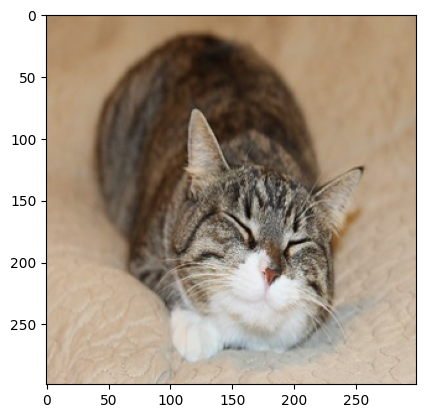

In [ ]:
i = 0
plt.imshow(data[i]);

In [ ]:
image = images[i]
np.random.seed(0)
explanation = explainer.explain(image, threshold=.95, p_sample=.5, tau=0.25)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 34s 7s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 6s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 27s 6s/step


In [ ]:
explanation.anchor.shape

(299, 299, 3)

In [ ]:
image

NameError: name 'image' is not defined

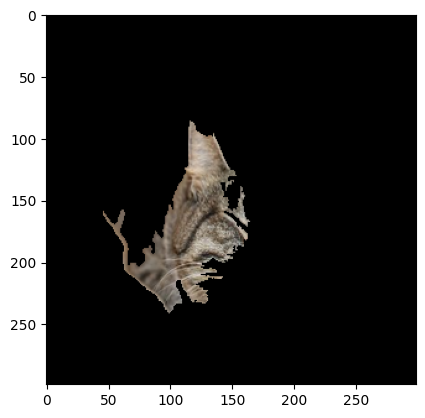

In [ ]:
plt.imshow(explanation.anchor);

# Another example

In [ ]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

! pip install alibi
from alibi.explainers import AnchorImage

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.0 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 24.2.0
    Uninstalling attrs-24.2.0:
      Successfully uninstalled attrs-24.2.0
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.23.2
    Uninstalling scikit-image-0.23.2:
      Successfully uninstalled scikit-image-0.23.2


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print('x_train shape:', x_train.shape, 'y_train shape:', y_train.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


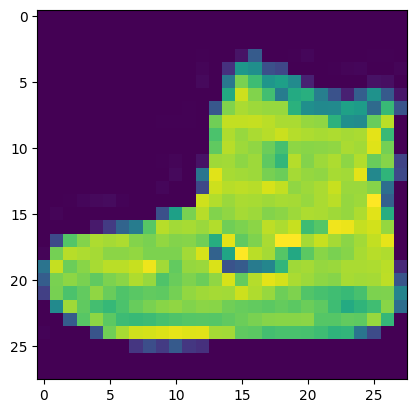

In [ ]:
idx = 0
plt.imshow(x_train[idx]);

In [ ]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = np.reshape(x_train, x_train.shape + (1,))
x_test = np.reshape(x_test, x_test.shape + (1,))
print('x_train shape:', x_train.shape, 'x_test shape:', x_test.shape)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('y_train shape:', y_train.shape, 'y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28, 1) x_test shape: (10000, 28, 28, 1)
y_train shape: (60000, 10) y_test shape: (10000, 10)


In [ ]:
def model():
    x_in = Input(shape=(28, 28, 1))
    x = Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')(x_in)
    x = MaxPooling2D(pool_size=2)(x)
    x = Dropout(0.3)(x)

    x = Conv2D(filters=32, kernel_size=2, padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=2)(x)
    x = Dropout(0.3)(x)

    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x_out = Dense(10, activation='softmax')(x)

    cnn = Model(inputs=x_in, outputs=x_out)
    cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return cnn

In [ ]:
cnn = model()
cnn.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         401,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 412,778 (1.57 MB)

 Trainable params: 412,778 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn.fit(x_train, y_train, batch_size=64, epochs=3)

Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.7007 - loss: 0.8040
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.8449 - loss: 0.4246
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 88s 90ms/step - accuracy: 0.8612 - loss: 0.3785


In [ ]:
# Evaluate the model on test set
score = cnn.evaluate(x_test, y_test, verbose=0)
print('Test accuracy: ', score[1])

Test accuracy:  0.8895999789237976


In [ ]:
def superpixel(image, size=(4, 7)):
    segments = np.zeros([image.shape[0], image.shape[1]])
    row_idx, col_idx = np.where(segments == 0)
    for i, j in zip(row_idx, col_idx):
        segments[i, j] = int((image.shape[1]/size[1]) * (i//size[0]) + j//size[1])
    return segments

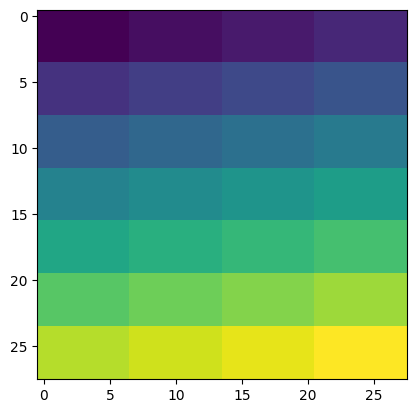

In [ ]:
segments = superpixel(x_train[idx])
plt.imshow(segments);

In [ ]:
predict_fn = lambda x: cnn.predict(x)

In [ ]:
image_shape = x_train[idx].shape
explainer = AnchorImage(predict_fn, image_shape, segmentation_fn=superpixel)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [ ]:
predict_fn

<function __main__.<lambda>(x)>

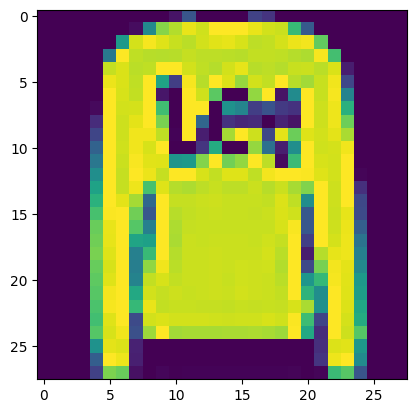

In [ ]:
i = 1
image = x_test[i]
plt.imshow(image[:,:,0]);

In [ ]:
explanation = explainer.explain(image, threshold=.95, p_sample=.9, seed=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [ ]:
image.shape

(28, 28, 1)

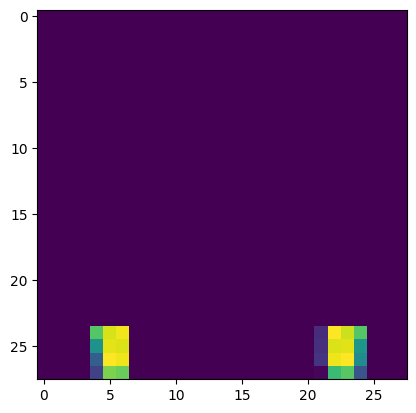

In [ ]:

plt.imshow(explanation.anchor[:,:,0]);

In [ ]:
image_shape

(28, 28, 1)

In [ ]:
explanation.segments.shape

(28, 28)